In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys

dir_path = os.path.abspath('')
sys.path.append(dir_path + '/../')
FILE = dir_path + '/data/' + 'soglia_diodo_crescente.csv'
FILE2 = dir_path + '/data/' + 'soglia_diodo_decrescente.csv'

from interpolazione import Interpolazione

In [10]:
fr = pd.read_csv(FILE)
fr2 = pd.read_csv(FILE2)

Ic = np.array(fr['I(uA)']) * 10**(-6)
Vc = np.array(fr['V'])
Id = np.array(fr2['I(uA)']) * 10**(-6)
Vd = np.array(fr2['V'])

$
I = I_0 (e^{\frac{qV}{gkT}} - 1)
$

In [11]:
def fI(V,I0,qgkt):
    return I0 * (np.exp(qgkt*V) - 1)

In [14]:
i = Interpolazione(Vd,Id,fI,0.005,p0=[0.00001,1])

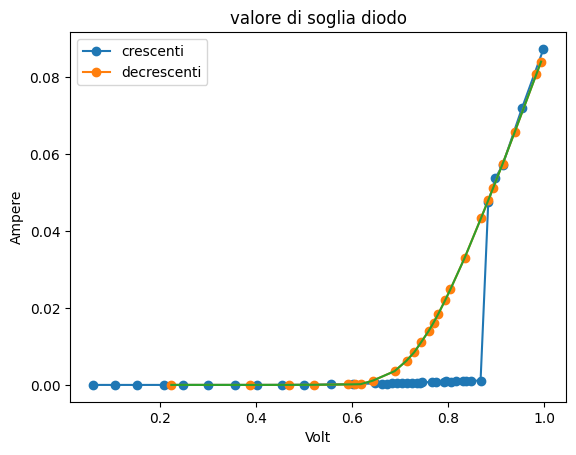

In [16]:
plt.title('valore di soglia diodo')
plt.plot(Vc,Ic,marker='o',label='crescenti')
plt.plot(Vd,Id,marker='o',label='decrescenti')
plt.plot(i.X,i.Y)
plt.xlabel('Volt')
plt.ylabel('Ampere')
plt.legend()
plt.show()